# (연구&교수님) HST example 3, 파이썬으로 변경

신록예찬  
2021-10-29

### import

In [390]:
## 1. remove trash
#!rm -rf ~/.local/share/Trash/files/*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rc('image', cmap='Greys')
import rpy2 
from adjustText import adjust_text
%load_ext rpy2.ipython
%run heavysnow 

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython

### load data

In [391]:
n=23
f=np.array(pd.read_csv("2021-08-15-MCU-ticket.csv").Worldwide)/1000000
V=np.array(pd.read_csv("2021-08-15-MCU-ticket.csv").Film)
W=np.array(pd.read_csv("2021-08-15-MCU-weights.csv",index_col=0))-np.eye(n,n)

### scatter plot

In [392]:
df=pd.DataFrame({'V':V,'f':f,'in_degree':[sum(W[:,i]) for i in range(n)],'out_degree':[sum(W[i,:]) for i in range(n)]})
df.head()

In [393]:
df['type']='SOLO/NOT-CORE'

In [394]:
df.loc[map(lambda x: ("Iron Man" in x) or ("Thor" in x) or ("Captain America" in x),df1.V),'type']='SOLO/CORE'
df.loc[map(lambda x: ("Avengers" in x) or ("Civil War" in x),df1.V),'type']='MULTI'

In [395]:
df

In [396]:
fig = ggplot(df) 
a1= aes(x='in_degree',y='out_degree',size='f',color='type')
a2= aes(x='in_degree',y='out_degree',label='V',color='type')
point1= geom_point(a1)

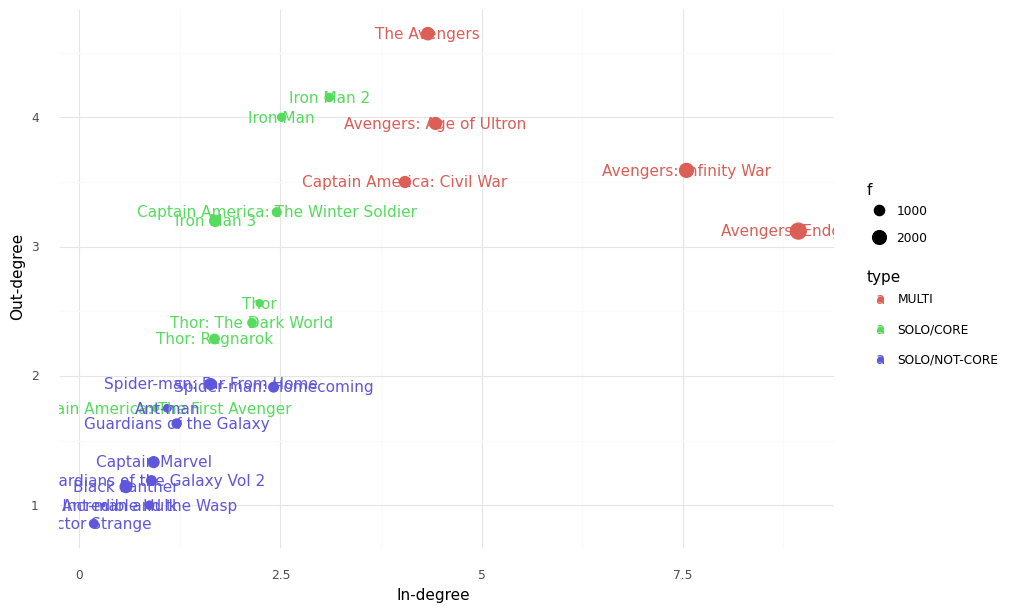

In [397]:
p1=fig+point1\
+xlab("In-degree")+ylab("Out-degree")\
+geom_text(a2)+theme_minimal()
p1=p1.draw()
p1.set_figheight(7)
p1.set_figwidth(10)

In [398]:
adjust_text(p1.axes[0].texts,ax=p1.axes[0], arrowprops=dict(arrowstyle='-', color='gray'))

500

<Figure size 432x288 with 0 Axes>

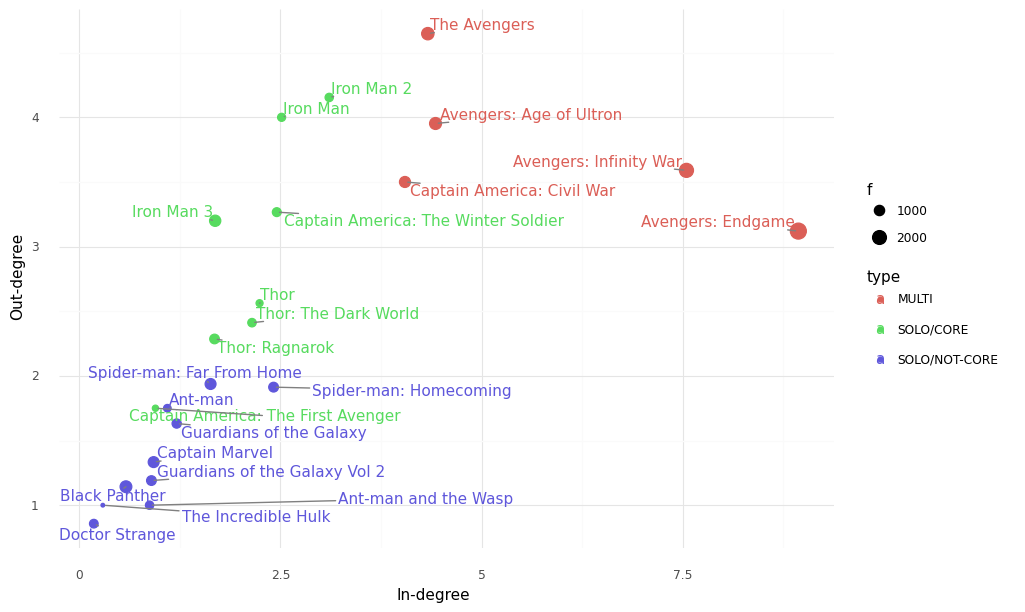

In [399]:
p1

### HST

In [650]:
gs=GraphSignal(V,W,f)
hst=HeavysnowTransform(gs)
hst.snow(tau=20000,b=1)

HST (tau= 20000, b=1)
20000/20000
HST completed and all history is recorded.

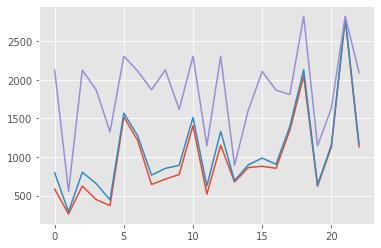

In [651]:
plt.plot(hst.snowygrounds[:,0])
plt.plot(hst.snowygrounds[:,2000])
plt.plot(hst.snowygrounds[:,20000])
plt.plot(hst.snowygrounds[:,40000])
plt.plot(hst.snowygrounds[:,60000])
plt.plot(hst.snowygrounds[:,-1])

### Spectral analysis

In [813]:
%run heavysnow
gs=GraphSignal(V,hst.snowweight,f)
spa=SpectralAnalysis(gs)
spa.graphFouriertransform()
spa.decompose()

/home/cgb3/Dropbox/01_yechan/_notebooks/heavysnow.py:11: RuntimeWarning: invalid value encountered in true_divide

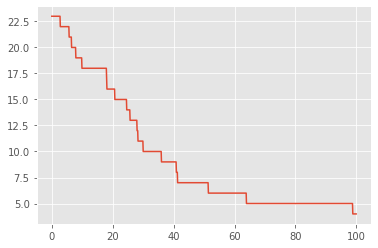

In [814]:
def choose_theta(maxtheta=100):
    y=[]
    x=np.arange(start=0.01,stop=maxtheta,step=0.1)
    for i in range(len(x)):
        hst.adjustingtheta(x[i]) 
        gs=GraphSignal(V,hst.snowweight,f)
        spa=SpectralAnalysis(gs)
        spa.graphFouriertransform()
        spa.decompose()        
        y.append(sum(abs(spa.lamb)<0.001))
    plt.plot(x,y)
choose_theta()   

In [667]:
abs(spa.fbar)

array([ 113.82693976,   69.1874798 ,  111.44376896,  120.73111873,
         27.31894564,   28.72744563,   18.9015293 ,  129.94958627,
         23.58492009,  117.97292179,   44.70789371,  257.06854198,
        389.82856746,  234.97154632,  296.21620356, 1134.27156442,
          4.21826872, 1321.97934777,  212.13470331, 3727.64704919,
        686.79172621, 1947.68808622, 2796.274401  ])

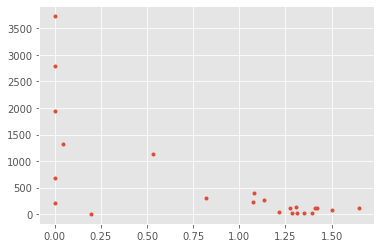

In [671]:
hst.adjustingtheta(100)
gs=GraphSignal(V,hst.snowweight,f)
spa=SpectralAnalysis(gs)
spa.graphFouriertransform()
spa.decompose() 
plt.plot(spa.lamb,abs(spa.fbar),'.')

In [675]:
abs(spa.fbar)

array([ 113.82693976,   69.1874798 ,  111.44376896,  120.73111873,
         27.31894564,   28.72744563,   18.9015293 ,  129.94958627,
         23.58492009,  117.97292179,   44.70789371,  257.06854198,
        389.82856746,  234.97154632,  296.21620356, 1134.27156442,
          4.21826872, 1321.97934777,  212.13470331, 3727.64704919,
        686.79172621, 1947.68808622, 2796.274401  ])

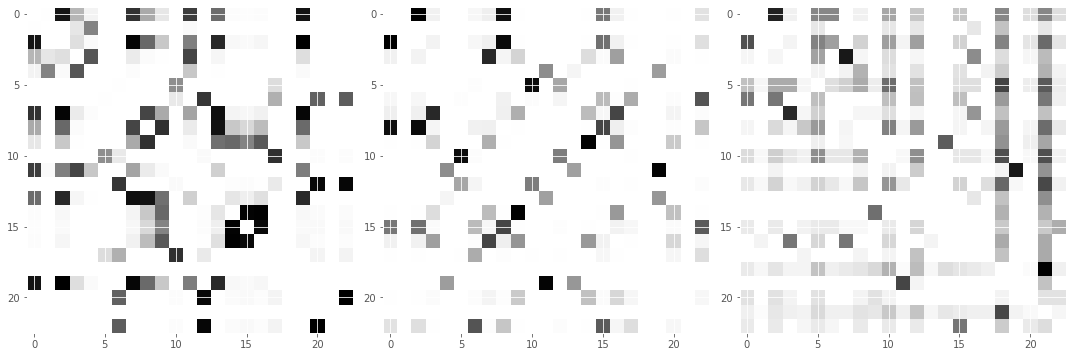

In [676]:
fig, axs= plt.subplots(1,3) 
axs[0].imshow(hst.euclidweight)
axs[1].imshow(hst.snowweight)
axs[2].imshow(hst.graphweight)
fig.set_figwidth(15)
fig.set_figheight(10)
fig.tight_layout()

In [792]:
_a = pd.DataFrame({'lambda_i':spa.lamb}).reset_index().rename(columns={'index':'comp'})
_b = pd.DataFrame(spa.components).stack().reset_index().rename(columns={'level_0':'Vindex','level_1':'comp',0:'fbar'})
_ = pd.merge(_a,_b)

In [801]:
df2 =_.assign(comp=list(map(lambda x: spa.n-x, _.comp))).merge(pd.DataFrame({'V':df.V,'Vindex':range(spa.n),'fill':df.type}))

In [802]:
df2

529 rows × 6 columns

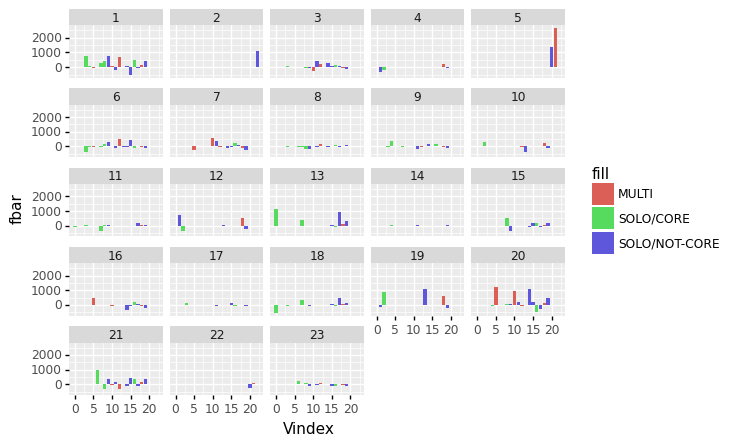

In [810]:
ggplot(df2)+facet_wrap('comp')+geom_col(aes(x='Vindex',y='fbar',fill='fill'))

2048.359754000001

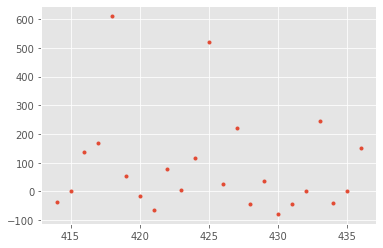

In [812]:
plt.plot(df2.query(" V=='Avengers: Infinity War' ")['fbar'],'.')
df2.query(" V=='Avengers: Infinity War' ")['fbar'].sum()

In [811]:
f

array([ 585.174222,  263.427551,  623.933331,  449.326618,  370.569774,
       1518.812988, 1214.811252,  644.571402,  714.264267,  773.328629,
       1405.403694,  519.311965, 1153.304495,  677.718395,  863.756051,
        880.166924,  853.977126, 1346.913161, 2048.359754,  622.674139,
       1128.274794, 2796.274401, 1131.026557])

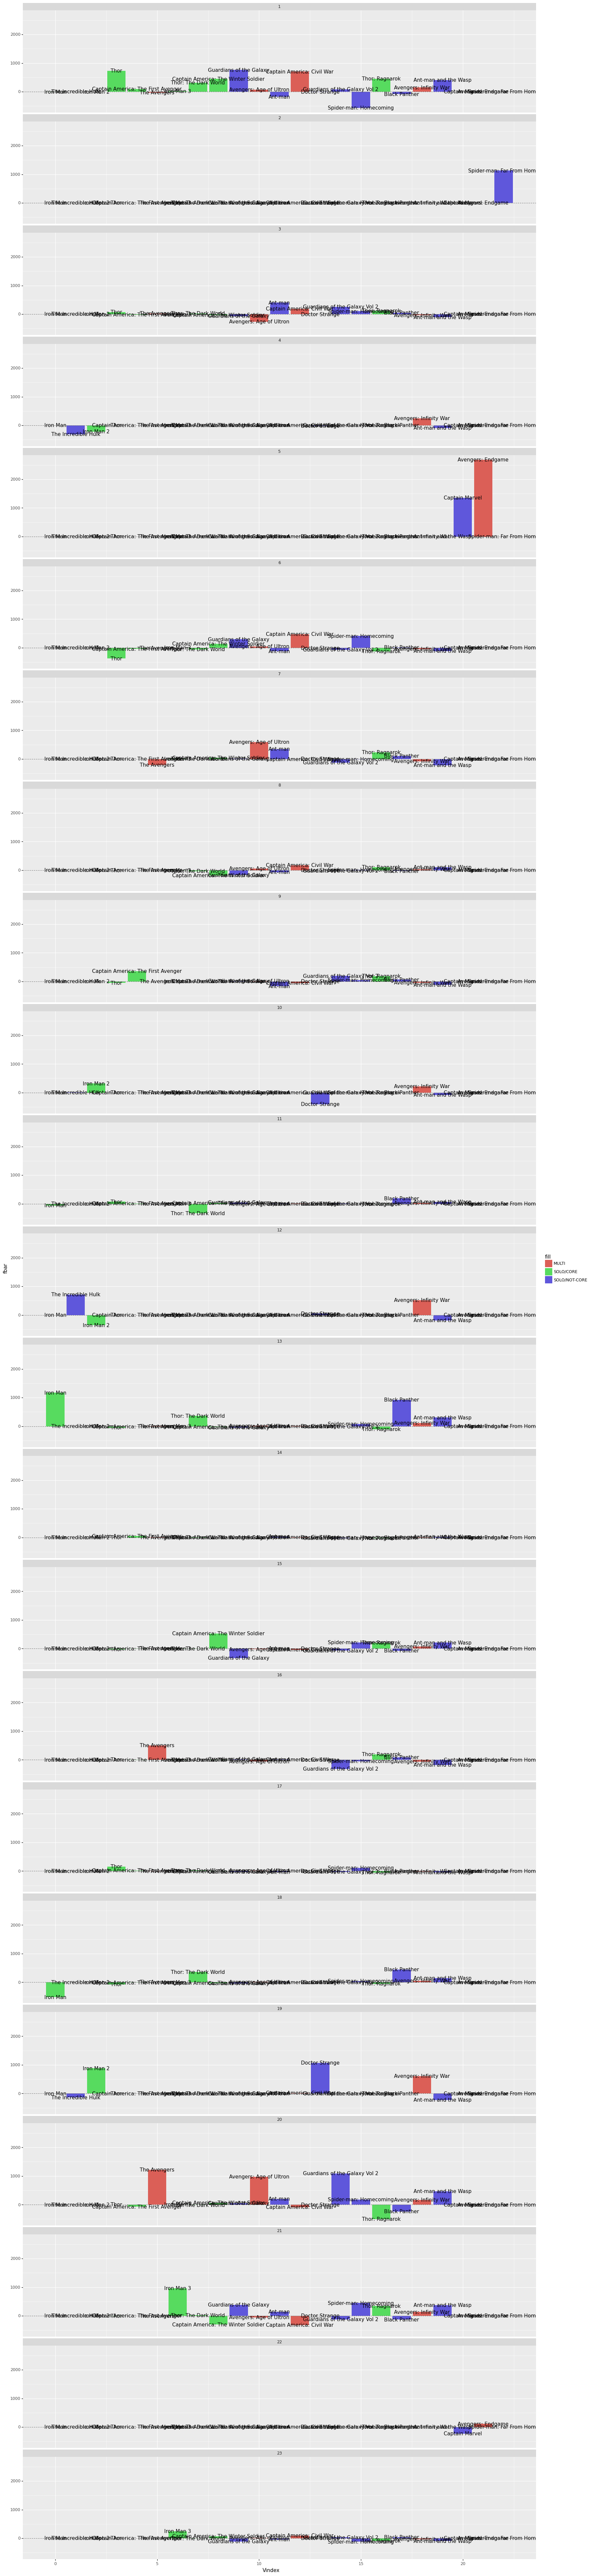

In [805]:
fig=ggplot(df2)
facet=facet_wrap('comp',ncol=1)
a1=aes(x='Vindex',y='fbar',fill='fill')
a2=aes(x='Vindex',y='fbar',label='V')
col=geom_col(a1,alpha=0.5)
hline=geom_hline(yintercept=0,linetype='dashed',color='gray',size=0.3)

p2=fig+facet\
+geom_col(a1)\
+geom_hline(yintercept=0,linetype='dashed',color='gray')\
+theme(figure_size=(20, 100))\
+geom_text(a2)
p2

### 유클리드와 그래프도메인의 정보를 플랏.

In [599]:
%R -i f

In [600]:
WW =hst.snowweight

In [601]:
%R -i WW

In [610]:
%%R 
degree<-function(W){
    diag(apply(W,1,sum))
}
degree_rootinv<-function(W){
    d<-apply(W,1,sum)
    drootinv<-d
    drootinv[d>0.01]<-sqrt(1/d[d>0.01])
    diag(drootinv)
}

In [611]:
%%R 
gfft<-function(f,W){
    n<-length(f)
    D<-degree(W)
    D_rootinv<-degree_rootinv(W)
    L<-D-W
    L_tilde<-D_rootinv%*%L%*%D_rootinv
    svdrslt<-svd(L_tilde)
    λ<-svdrslt$d
    Λ<-diag(λ)
    U<-svdrslt$u; 
    V<-svdrslt$v; 
    Ψ<-U
    ## reconstruction: L_tilde <- U%*%Lamb*t(V) or L_tilde <- Psi%*%Lamb*t(Psi)
    fbar<-as.vector(t(Ψ)%*%f) ## fhat is Fourier Transform of f. 
    list(λ=λ,Ψ=Ψ,fbar=fbar)
}

In [612]:
%%R 
Psi=gfft(f,WW)$Ψ
lamb=gfft(f,WW)$λ
fbar=gfft(f,WW)$fbar

In [613]:
%R -o Psi 
%R -o lamb 
%R -o fbar

In [614]:
%%R 
A=rbind(c(1,2,4,5),c(2,3,1,0),c(5,4,0,2),c(2,0,0,1))
svd(L_tilde)

$d
 [1]  2.000000e+00  2.000000e+00  2.220446e-16  1.251279e-71  2.072649e-87
 [6] 3.094230e-204 3.094230e-204  0.000000e+00  0.000000e+00  0.000000e+00
[11]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
[16]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
[21]  0.000000e+00  0.000000e+00  0.000000e+00

$u
            [,1]           [,2]       [,3]       [,4]       [,5]           [,6]
 [1,]  0.0000000   0.000000e+00  0.0000000  0.0000000  0.0000000   0.000000e+00
 [2,]  0.0000000   0.000000e+00  0.0000000  0.0000000  0.0000000   0.000000e+00
 [3,]  0.0000000  -7.071068e-01  0.0000000  0.0000000  0.0000000 -1.995229e-204
 [4,]  0.0000000   0.000000e+00  0.0000000  0.0000000  0.0000000   0.000000e+00
 [5,]  0.0000000   0.000000e+00  0.0000000  0.0000000  0.0000000   0.000000e+00
 [6,]  0.0000000   0.000000e+00  0.0000000  0.0000000  0.0000000   0.000000e+00
 [7,]  0.0000000   0.000000e+00  0.0000000  0.0000000  0.0000000   0.000000e+00
 [8,] 

In [615]:
np.linalg.svd(spa.Lz)

(array([[ 8.31802845e-07, -2.28244345e-02,  1.69005964e-05,
          8.32458517e-05,  1.37445367e-03, -1.69822716e-03,
         -2.72169523e-04,  1.62367170e-01,  1.00120612e-01,
          7.87048705e-01,  2.28051493e-03,  1.30702273e-01,
         -2.37071773e-01, -1.52905997e-02,  2.00695093e-01,
          2.67355662e-01, -2.13953115e-01,  1.09902642e-01,
          7.86967503e-02, -1.48612089e-01, -2.68747745e-01,
          1.30686848e-15,  0.00000000e+00],
        [-1.73745237e-07,  5.82817056e-01,  3.19679606e-06,
          1.95527208e-05, -4.01026817e-04,  1.79423330e-03,
          1.42218015e-03, -2.93595666e-01, -1.03797754e-02,
          1.14069591e-01,  6.91273124e-04,  4.16978017e-02,
         -8.86891483e-02, -1.23071410e-02,  2.91466972e-01,
         -4.03091203e-01,  4.10097210e-01,  3.04233036e-01,
          1.72107925e-01, -5.85142438e-02, -1.00131938e-01,
          4.86771502e-16,  0.00000000e+00],
        [ 1.79945470e-06, -8.86372067e-03, -1.04110175e-05,
         -9.

In [616]:
%run heavysnow.py
spa=SpectralAnalysis(gs)
spa.graphFouriertransform()
spa.decompose()

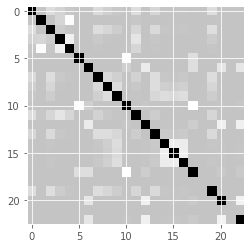

In [617]:
plt.imshow(spa.Lz)

In [618]:
spa.Lz[13:18,13:18]

array([[ 1.00000000e+00, -3.47748512e-02, -2.56935107e-02,
        -4.14298210e-02, -6.56720534e-12],
       [-3.47748512e-02,  1.00000000e+00, -3.13567731e-01,
        -2.95687253e-01, -1.13797574e-06],
       [-2.56935107e-02, -3.13567731e-01,  1.00000000e+00,
        -2.99256990e-01, -2.77663248e-06],
       [-4.14298210e-02, -2.95687253e-01, -2.99256990e-01,
         1.00000000e+00, -6.51246540e-07],
       [-6.56720534e-12, -1.13797574e-06, -2.77663248e-06,
        -6.51246540e-07,  1.00000000e+00]])

In [619]:
%%R 
    D<-degree(WW)
    D_rootinv<-degree_rootinv(WW)
    L<-D-WW
    L_tilde<-D_rootinv%*%L%*%D_rootinv

In [620]:
%R -o L_tilde

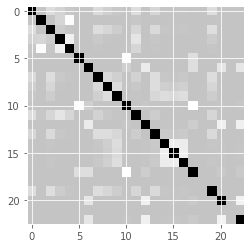

In [621]:
plt.imshow(spa.Lz)

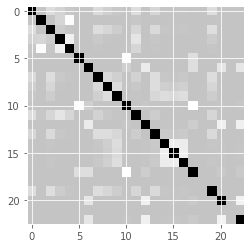

In [622]:
plt.imshow(L_tilde)

In [623]:
spa.Psi[0]

array([ 8.31802845e-07, -2.28244345e-02,  1.69005964e-05,  8.32458517e-05,
        1.37445367e-03, -1.69822716e-03, -2.72169523e-04,  1.62367170e-01,
        1.00120612e-01,  7.87048705e-01,  2.28051493e-03,  1.30702273e-01,
       -2.37071773e-01, -1.52905997e-02,  2.00695093e-01,  2.67355662e-01,
       -2.13953115e-01,  1.09902642e-01,  7.86967503e-02, -1.48612089e-01,
       -2.68747745e-01,  1.30686848e-15,  0.00000000e+00])

In [624]:
Psi[0]

array([ 8.31802846e-07, -2.28244345e-02,  1.69005964e-05,  8.32458517e-05,
        1.37445367e-03, -1.69822716e-03, -2.72169523e-04,  1.62367170e-01,
        1.00120612e-01,  7.87048705e-01,  2.28051493e-03, -1.30702273e-01,
       -2.37071773e-01, -1.52905997e-02,  2.00695093e-01,  2.67355662e-01,
       -2.13953115e-01,  1.09902642e-01,  7.86967503e-02, -1.48612089e-01,
       -2.68747745e-01,  4.53298893e-07,  1.40733495e-38])

In [625]:
spa.fbar

array([-2.10281887e+02,  1.40244756e+01,  8.71311468e+00,  7.45361934e+01,
       -3.80931713e+01,  6.17719604e+01, -2.14128291e+02, -3.55025393e+00,
        1.92122028e+01, -3.86380121e+00,  4.42134781e-01, -8.70162667e+00,
        1.07088816e+01,  3.00488134e+02,  3.01659077e+01,  4.85119271e+01,
        3.80885030e+02, -7.85570930e+02,  5.73774201e+02,  1.80256280e+03,
       -3.59847855e+03, -2.04835975e+03, -2.79627440e+03])

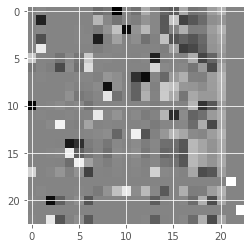

In [626]:
plt.imshow(spa.Psi)

In [627]:
U, lamb, Vt =np.linalg.svd(spa.Lz)

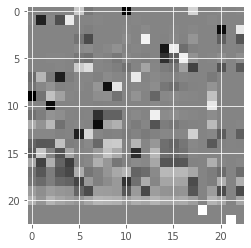

In [628]:
plt.imshow(Vt)

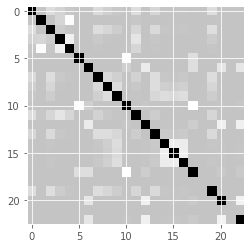

In [629]:
plt.imshow(U @ np.diag(lamb) @ Vt)

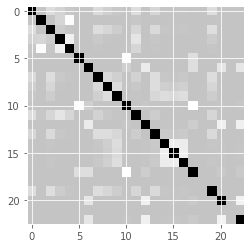

In [630]:
plt.imshow(spa.Lz)

In [631]:
fbar

array([-2.10281887e+02,  1.40244756e+01,  8.71311468e+00,  7.45361934e+01,
       -3.80931713e+01,  6.17719604e+01, -2.14128291e+02, -3.55025393e+00,
        1.92122028e+01, -3.86380121e+00,  4.42134781e-01,  8.70162667e+00,
        1.07088816e+01,  3.00488134e+02,  3.01659077e+01,  4.85119271e+01,
        3.80885030e+02, -7.85570930e+02,  5.73774201e+02,  1.80256280e+03,
       -3.59847510e+03,  2.04836582e+03, -2.79627440e+03])

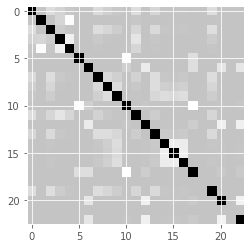

In [632]:
plt.imshow(Psi @np.diag(lamb) @ Psi.T)

In [633]:
Psi

array([[ 8.31802846e-07, -2.28244345e-02,  1.69005964e-05,
         8.32458517e-05,  1.37445367e-03, -1.69822716e-03,
        -2.72169523e-04,  1.62367170e-01,  1.00120612e-01,
         7.87048705e-01,  2.28051493e-03, -1.30702273e-01,
        -2.37071773e-01, -1.52905997e-02,  2.00695093e-01,
         2.67355662e-01, -2.13953115e-01,  1.09902642e-01,
         7.86967503e-02, -1.48612089e-01, -2.68747745e-01,
         4.53298893e-07,  1.40733495e-38],
       [-1.73745234e-07,  5.82817056e-01,  3.19679606e-06,
         1.95527208e-05, -4.01026817e-04,  1.79423330e-03,
         1.42218015e-03, -2.93595666e-01, -1.03797754e-02,
         1.14069591e-01,  6.91273124e-04, -4.16978017e-02,
        -8.86891483e-02, -1.23071410e-02,  2.91466972e-01,
        -4.03091203e-01,  4.10097210e-01,  3.04233036e-01,
         1.72107925e-01, -5.85142438e-02, -1.00131938e-01,
         1.68893309e-07,  5.24354816e-39],
       [ 1.79945470e-06, -8.86372067e-03, -1.04110175e-05,
        -9.71301027e-06,  4.5

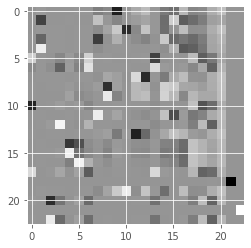

In [634]:
plt.imshow(Psi)

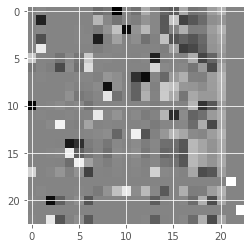

In [635]:
plt.imshow(spa.Psi)

In [815]:
%%R -r 150 -w 2000 -h 660
source('heavysnow.R')
dat_<-tibble(V)
dat_$f<-as.vector(f)
dat_$divlink<-0
dat_$conlink<-0
dat_$link<-0
dat<-dat_
for(i in 1:23){
    dat$divlink[i]<-sum(W[i,])
    dat$conlink[i]<-sum(W[,i])
    dat$link[i]<-sum(W[i,])+sum(W[i,])
}
p1_<-ggplot(dat)+geom_point(aes(x=f,y=divlink),size=3)+theme_light()+
        geom_text_repel(aes(x=f,y=divlink,label=V),col="gray40")+
        ylab("Out-degree")+xlab("Box office record")+
        geom_hline(aes(yintercept=2),col=2,lty=2,lwd=0.5)+
        geom_vline(aes(xintercept=1000),col=2,lty=2,lwd=0.5)+
        ggtitle("(a)")+theme(plot.title=element_text(face="bold.italic",size=rel(2)))+
        theme(axis.title.x=element_text(face=4,size=rel(1)))+
        theme(axis.title.y=element_text(face=4,size=rel(1)))
p2_<-ggplot(dat)+geom_point(aes(x=f,y=conlink),size=3)+theme_light()+
        geom_text_repel(aes(x=f,y=conlink,label=V),col="gray40")+
        ylab("In-degree")+xlab("Box office record")+
        geom_hline(aes(yintercept=3.75),col=2,lty=2,lwd=0.5)+
        geom_vline(aes(xintercept=1000),col=2,lty=2,lwd=0.5)+
        ggtitle("(b)")+theme(plot.title=element_text(face="bold.italic",size=rel(2)))+
        theme(axis.title.x=element_text(face=4,size=rel(1)))+
        theme(axis.title.y=element_text(face=4,size=rel(1)))
# p3_<-ggplot(dat)+geom_point(aes(x=f,y=link),size=3)+theme_light()+
#         geom_text_repel(aes(x=f,y=link,label=V),col="gray40")+
#         ylab("Graph")+xlab("Box office record")+
#         geom_hline(aes(yintercept=6.25),col=2,lty=2,lwd=0.5)+
#         geom_vline(aes(xintercept=1000),col=2,lty=2,lwd=0.5)+
#         ggtitle("(c)")
p1<-grid.arrange(p1_,p2_,ncol=2)
#ggsave(plot=p1,"./fig/p1.pdf",width=9,height=4.5)

R[write to console]: Error in library(kohonen) : there is no package called ‘kohonen’



Error in library(kohonen) : there is no package called ‘kohonen’

### gfft 수행하고 결과를 저장함.

In [ ]:
%%R 
g1<-gfft(f,WEuclid)
g2<-gfft(f,Wgraph)
g3<-gfft(f,Whst)

### 아이겐플랏

In [ ]:
%%R -r 150 -w 1000 -h 400
library(gridExtra)
e1<-eigenplot(g1)+ggtitle("(a) Euclid weights")+theme(plot.title=element_text(face="bold.italic",size=rel(1)))
e2<-eigenplot(g2)+ggtitle("(b) Graph weights")+theme(plot.title=element_text(face="bold.italic",size=rel(1)))
e3<-eigenplot(g3)+ggtitle("(c) HST weights")+theme(plot.title=element_text(face="bold.italic",size=rel(1)))
s1<-specplot(g1)
s2<-specplot(g2)
s3<-specplot(g3)
p2<-grid.arrange(e1,e2,e3,s1,s2,s3,nrow=2)
#ggsave(plot=p2,"./fig/p2.pdf",width=6,height=3)

### 분해

In [ ]:
%%R -r 300 -w 2500 -h 1500
d1<-decompose(f,WEuclid,V=V) # 0, 35000, 60000, 80000
d2<-decompose(f,Wgraph,V=V) # 0, 35000, 60000, 80000
d3<-decompose(f,Whst,V=V) # 0, 35000, 60000, 80000

d1$case<-"Euclid"
d2$case<-"Graph"
d3$case<-"HST"
decomprslt<-rbind(d1,d2,d3)

In [ ]:
%%R -r 150 -w 2000 -h 4200

decomp_dat<- decomprslt %>% 
                group_by(case,eigenvectorindex) %>% 
                mutate(textsize= 10*(abs(fhat)>50))
        
p3<-ggplot(data=filter(decomp_dat,eigenvectorindex %in% 1:23))+
    geom_col(aes(x=Vindex,y=fhat,fill=fhat>0),width=0.7)+
    geom_text_repel(aes(x=Vindex,y=fhat,label=V,size=textsize),col=1,fontface=4,alpha=0.8,segment.size=0.2,segment.color="gray60",min.segment.length=5,hjust=0.1)+
    scale_radius(range = c(0,1.8))+
    guides(size=FALSE)+
    facet_grid(eigenvectorindex~case)+
    geom_hline(aes(yintercept=0),col="gray60",lty=2)+
    xlab("")+ylab("")+guides(fill=FALSE)+
    theme(axis.text.x=element_text(angle=85,hjust=1,vjust=1,face=4,size=rel(0.7),colour="gray60"))+
    theme_light()+
    theme(strip.text.x = element_text(size = 10, color = "black", face = "bold.italic"))+
    theme(strip.text.y = element_text(size = 10, color = "black", face = "bold.italic"))+
    theme(plot.title=element_text(face="bold.italic",size=rel(1.5)))
show(p3)

# decomp_dat<- decomprslt %>% 
#                 group_by(case,eigenvectorindex) %>% 
#                 mutate(textsize=(fhat>mean(fhat)) *(fhat>240) * ((case=="Euclid")*1.7+
#                                                                  (case!="Euclid")*(eigenvectorindex!=1)*1.7+
#                                                                  (case!="Euclid")*(eigenvectorindex==1)*1))


# p3<-ggplot(data=filter(decomp_dat,eigenvectorindex %in% 1:7))+
#     geom_col(aes(x=Vindex,y=fhat,fill=fhat>0),width=0.7)+
#     geom_text_repel(aes(x=Vindex,y=fhat,label=V,size=textsize),col=1,fontface=4,alpha=0.8,segment.size=0.2,segment.color="gray60",min.segment.length=5,hjust=0.1)+
#     scale_radius(range = c(0,1.8))+
#     guides(size=FALSE)+
#     facet_grid(eigenvectorindex~case)+
#     geom_hline(aes(yintercept=0),col="gray60",lty=2)+
#     xlab("")+ylab("")+guides(fill=FALSE)+
#     theme(axis.text.x=element_text(angle=85,hjust=1,vjust=1,face=4,size=rel(0.7),colour="gray60"))+
#     theme_light()+
#     theme(strip.text.x = element_text(size = 10, color = "black", face = "bold.italic"))+
#     theme(strip.text.y = element_text(size = 10, color = "black", face = "bold.italic"))+
#     theme(plot.title=element_text(face="bold.italic",size=rel(1.5)))
# show(p3)
#ggsave(plot=p3,"./fig/p3.pdf",width=6,height=6)

In [ ]:
%%R
dat3_Euclid <- decomp_dat %>% filter(case=="Euclid",eigenvectorindex==1) %>% select(V,case,eigenvectorindex,textsize,fhat)
dat3_Euclid <- left_join(dat,dat3_Euclid,by="V")

for(j in 2:23){
        decomp_filtered_dat_<- decomp_dat %>% filter(case=="Euclid",eigenvectorindex==j) %>% select(V,case,eigenvectorindex,textsize,fhat)
        decomp_filtered_dat_<- left_join(dat,decomp_filtered_dat_,by="V")
        dat3_Euclid<-rbind(dat3_Euclid,decomp_filtered_dat_)
}

dat3_Graph <- decomp_dat %>% filter(case=="Graph",eigenvectorindex==1) %>% select(V,case,eigenvectorindex,textsize,fhat)
dat3_Graph <- left_join(dat,dat3_Graph,by="V")

for(j in 2:23){
        decomp_filtered_dat_<- decomp_dat %>% filter(case=="Graph",eigenvectorindex==j) %>% select(V,case,eigenvectorindex,textsize,fhat)
        decomp_filtered_dat_<- left_join(dat,decomp_filtered_dat_,by="V")
        dat3_Graph<-rbind(dat3_Graph,decomp_filtered_dat_)
}

dat3_HST <- decomp_dat %>% filter(case=="HST",eigenvectorindex==1) %>% select(V,case,eigenvectorindex,textsize,fhat)
dat3_HST <- left_join(dat,dat3_HST,by="V")

for(j in 2:23){
        decomp_filtered_dat_<- decomp_dat %>% filter(case=="HST",eigenvectorindex==j) %>% select(V,case,eigenvectorindex,textsize,fhat)
        decomp_filtered_dat_<- left_join(dat,decomp_filtered_dat_,by="V")
        dat3_HST<-rbind(dat3_HST,decomp_filtered_dat_)
}
dat3<-rbind(dat3_Euclid,dat3_Graph,dat3_HST)

In [ ]:
%%R -r 300 -w 2000 -h 3000
hull_cyl <- dat3 %>%
            group_by(case,eigenvectorindex) %>% 
            filter(textsize>0) %>% 
            slice(chull(f, divlink))
p4<-ggplot(dat3%>% filter(eigenvectorindex<8))+geom_point(aes(x=f,y=divlink,col=textsize>0,size=fhat*(fhat>0)),alpha=0.8)+
        geom_shape(data=hull_cyl%>% filter(eigenvectorindex<8) ,aes(x=f,y=divlink),alpha=0.05,col="gray30",radius=0.05,expand=0.05)+
        facet_grid(eigenvectorindex~case)+
        scale_size_continuous(range=c(2,2.5))+
        scale_color_manual(values=c("gray80", "gray20"))+
        ylim(0,8)+xlim(0,3000)+
        guides(alpha=F)+
        guides(col=F)+
        guides(size=F)+
        ylab("")+xlab("")+
        geom_hline(aes(yintercept=2),col="gray30",lty=2,lwd=0.2)+
        geom_vline(aes(xintercept=1000),col="gray30",lty=2,lwd=0.2)+
        theme_light()+
        theme(strip.text.x = element_text(size = 10, color = "black", face = "bold.italic"))+
        theme(strip.text.y = element_text(size = 10, color = "black", face = "bold.italic"))+
        theme(plot.title=element_text(face="bold.italic",size=rel(1.5)))
show(p4)
#ggsave(plot=p4,"./fig/p4.pdf",width=7,height=7)

In [ ]:
%%R -r 300 -w 2000 -h 3000
hull_cyl <- dat3 %>%
            group_by(case,eigenvectorindex) %>% 
            filter(textsize>0) %>% 
            slice(chull(f, conlink))
p5<-ggplot(dat3%>% filter(eigenvectorindex<8))+geom_point(aes(x=f,y=conlink,col=textsize>0,size=fhat*(fhat>0)),alpha=0.8)+
        geom_shape(data=hull_cyl%>% filter(eigenvectorindex<8) ,aes(x=f,y=conlink),alpha=0.05,col="gray30",radius=0.05,expand=0.05)+
        facet_grid(eigenvectorindex~case)+
        scale_size_continuous(range=c(2,2.5))+
        scale_color_manual(values=c("gray80", "gray20"))+        
        ylim(0,10)+xlim(0,3000)+
        guides(col=F)+
        guides(alpha=F)+
        guides(size=F)+       
        ylab("")+xlab("")+
        geom_hline(aes(yintercept=3.75),col="gray30",lty=2,lwd=0.2)+
        geom_vline(aes(xintercept=1000),col="gray30",lty=2,lwd=0.2)+
        theme_light()+
        theme(strip.text.x = element_text(size = 10, color = "black", face = "bold.italic"))+
        theme(strip.text.y = element_text(size = 10, color = "black", face = "bold.italic"))+
        theme(plot.title=element_text(face="bold.italic",size=rel(1.5)))
show(p5)
#ggsave(plot=p5,"./fig/p5.pdf",width=7,height=7)        

In [ ]:
%%R -r 300 -w 2000 -h 1500
p_<-grid.arrange(p4,p5,ncol=2)
#ggsave(plot=p6,"./fig/p6.pdf",width=10,height=12)

In [ ]:
%%R -r 200 -w 2000 -h 3000
p6<-grid.arrange(p1,p_,nrow=2,heights=c(3,5))